In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.naive_bayes import GaussianNB

import project_env

%matplotlib inline

In [2]:
data_519 = project_env.load_split_bucket(519, target='y_60m', log=False)

In [3]:
training_X, training_y = data_519['train']

print(len(training_X.columns))
print(training_X.columns)

22
Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'nearestStormDistance', 'ozone', 'precipIntensity', 'precipProbability',
       'pressure', 'temperature', 'visibility', 'windBearing', 'windSpeed',
       'num_bikes_available_scaled', 'num_bikes_disabled_scaled',
       'num_docks_available_scaled', 'day_of_week', 'hour_of_day',
       'is_weekend', 'traffic_0_speed_scrub', 'traffic_1_speed_scrub',
       'traffic_2_speed_scrub'],
      dtype='object')


In [4]:
def do_gnb(split_data):
    train_X, train_y = split_data['train']
    dev_X, dev_y = split_data['dev']

    scaler = sklearn.preprocessing.StandardScaler()
    train_X = scaler.fit_transform(train_X)
    dev_X = scaler.fit_transform(dev_X)

    print('X shape:', train_X.shape)

    gnb = GaussianNB()
    gnb.fit(train_X, train_y)
    
    dev_pred = gnb.predict(dev_X)
    dev_pred_prob = gnb.predict_proba(dev_X)[:,1]
    
    acc = accuracy_score(dev_y, dev_pred)
    print('Evaluating on dev set of {} examples'.format(len(dev_y)))
    print('Accuracy:', acc)
    
    print(confusion_matrix(dev_y, dev_pred))

    plt.figure()
    plt.plot(dev_y.as_matrix()[100:500], 'b')
    plt.plot(dev_pred[100:500], 'g')
    plt.plot(0.5 * (dev_y.as_matrix() - dev_pred)[100:500], 'r')
    plt.ylim(-3, 3)
    plt.show()
    
    return gnb, dev_pred, dev_pred_prob


X shape: (4236, 22)
Evaluating on dev set of 968 examples
Accuracy: 0.704545454545
[[521  64]
 [222 161]]


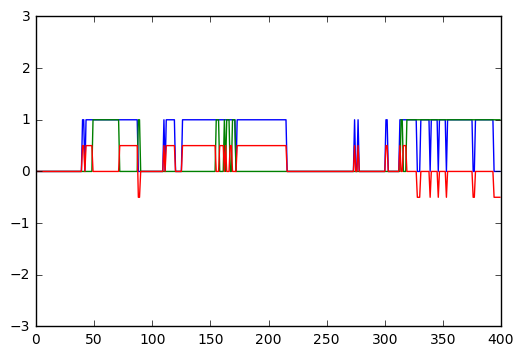

In [5]:
data_empty = project_env.binarize(data_519, -1)
gnb_empty, dev_pred_empty, dev_pred_prob_empty = do_gnb(data_empty)

X shape: (4236, 22)
Evaluating on dev set of 968 examples
Accuracy: 0.944214876033
[[893  27]
 [ 27  21]]


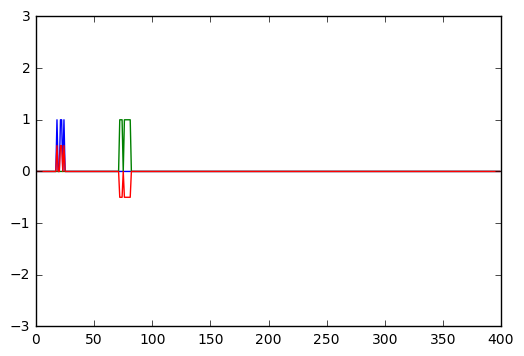

In [6]:
data_full = project_env.binarize(data_519, 1)
gnb_full, dev_pred_full, dev_pred_prob_full = do_gnb(data_full)

Model empty: baseline
  Max precision: 0.528301886792 at recall 0.950391644909
  Threshold of max precision: 0.540983606557
Model empty: Naive Bayes
  Max precision: 0.478947368421 at recall 0.950391644909
  Threshold of max precision: 2.42023828986e-11


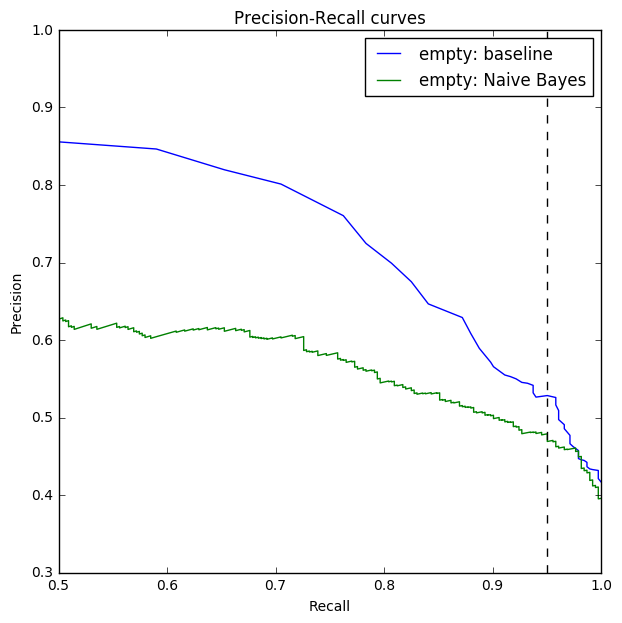

In [12]:
# precision recall curves

gold_labels = data_empty['dev'][1]

def pr_curve(predictions, label):
    curve = precision_recall_curve(gold_labels, predictions)
    precision, recall, thresholds = curve
    mp, mr, mt = project_env.max_precision_for_recall(curve)
    print('Model', label)
    print('  Max precision:', mp, 'at recall', mr)
    print('  Threshold of max precision:', mt)
    plt.plot(recall, precision, label=label)
   
plt.figure(figsize=(7, 7))
pr_curve(data_empty['dev'][0]['num_docks_available_scaled'], 'empty: baseline')
pr_curve(dev_pred_prob_empty, 'empty: Naive Bayes')

plt.xlim([0.5, 1.0])
#plt.ylim([0.4, 0.7])
plt.axvline(x=0.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="upper right")
plt.title('Precision-Recall curves')
plt.show()

Model full: baseline
  Max precision: 0.0496380558428 at recall 1.0
  Threshold of max precision: 0.016393442623
Model full: Naive Bayes
  Max precision: 0.279069767442 at recall 1.0
  Threshold of max precision: 0.000615461914858


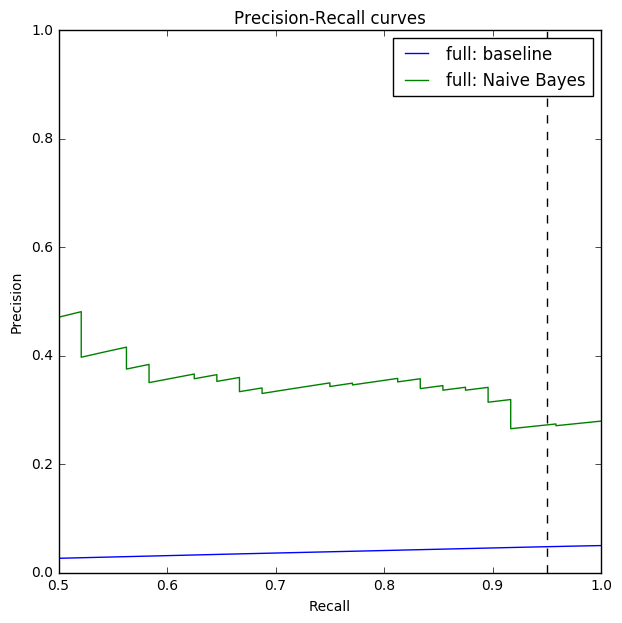

In [13]:
# precision recall curves: full

gold_labels = data_full['dev'][1]

def pr_curve(predictions, label):
    curve = precision_recall_curve(gold_labels, predictions)
    precision, recall, thresholds = curve
    mp, mr, mt = project_env.max_precision_for_recall(curve)
    print('Model', label)
    print('  Max precision:', mp, 'at recall', mr)
    print('  Threshold of max precision:', mt)
    plt.plot(recall, precision, label=label)
   
plt.figure(figsize=(7, 7))
pr_curve(data_full['dev'][0]['num_docks_available_scaled'], 'full: baseline')
pr_curve(dev_pred_prob_full, 'full: Naive Bayes')

plt.xlim([0.5, 1.0])
# plt.ylim([0.4, 0.7])
plt.axvline(x=0.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="upper right")
plt.title('Precision-Recall curves')
plt.show()